In [1]:
import sys
import h5py
import numpy as np
import healpy as hp
import tensorflow as tf
import random as python_random
import nnhealpix.layers
import matplotlib.pyplot as plt
from tensorflow.keras import metrics
import keras
import pandas as pd
import os, shutil
import NN_functions as nuf
from loss_functions import sigma_loss, sigma_f_loss, sigma2_loss,sigma_batch_loss,sigma_norm_loss,sigma_log_loss,mse_tau,mse_sigma

2023-07-02 23:43:45.996783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 23:43:47.204655: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-02 23:43:47.204782: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-02 23:43:47.204799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
import matplotlib.pyplot as plt

In [29]:
#y_train=y_train_sigma, pred=predictions_sigma, norm=red,
#y_train_tau=predictions_train,y_train_nn=y_train_nn
f=np.load("/home/amorelli/E_foreground/29_6_23/predictions.npz")
#np.savez(base_dir+"predictions",y_train=y_train_sigma, pred=predictions_sigma, norm=red)
y_train_sigma=f["y_train"]
pred_sigma=f["pred"]
norm_sigma=f["norm"]
y_train_nn=f["y_train_nn"]
pred_tau=f["y_train_tau"]
print(y_train_sigma.shape,pred_sigma.shape,norm_sigma.shape,y_train_nn.shape,pred_tau.shape)
print(pred_tau)
#pred_tau.sort(axis=0)
#print(pred_tau)

(89200, 1) (89200, 1) (89199,) (89200, 1) (89200, 1)
[[-1.5446935]
 [-1.6605395]
 [-1.622975 ]
 ...
 [ 1.5499599]
 [ 1.6801866]
 [ 1.4717021]]


In [15]:
f_2=np.load("/home/amorelli/E_foreground/25_6_23/predictions.npz")
#np.savez(base_dir+"predictions",y_train=y_train_sigma, pred=predictions_sigma, norm=red)
y_train_tau=f_2["y_train"]
y_train_tau.sort(axis=0)
#pred_tau=f_2["pred"][:,0]
norm_tau=f_2["norm"]
print(y_train_tau)
print(y_train_tau.shape,norm_tau.shape)

[[-1.73060803]
 [-1.73060803]
 [-1.73060803]
 ...
 [ 1.73060803]
 [ 1.73060803]
 [ 1.73060803]]
(89200, 1) (1200,)


In [33]:
pred_tau_norm=nuf.denormalize_data(pred_tau.flatten(),norm_tau)
pred_sigma=nuf.denormalize_data(pred_sigma.flatten(),norm_sigma)
#y_train_tau_norm=nuf.denormalize_data(y_train_tau.flatten(),norm_tau)
y_train_sigma=nuf.denormalize_data(y_train_sigma.flatten(),norm_sigma)

In [34]:
print(y_train_sigma.shape,pred_sigma.shape,norm_sigma.shape,y_train_nn.shape,pred_tau.shape)

(89200,) (89200,) (89199,) (89200, 1) (89200, 1)


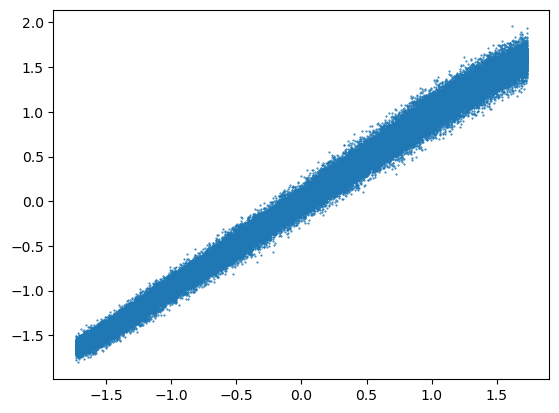

In [35]:
plt.plot(y_train_tau,pred_tau,linestyle="None",marker='.', markersize = 1.0)

In [36]:
var=(pred_tau_norm[:]-y_train_tau_norm[:])**2
var_2=(pred_tau-y_train_tau)**2 * np.std(norm_tau)**2

In [37]:
print(var_2.shape)

(89200, 1)


In [38]:
print(np.mean(var),np.mean(var_2),np.mean(y_train_sigma),np.mean(y_train_nn))
print(np.mean(norm_sigma))
#print(var)

1.0262731287592757e-05 1.0262729454514273e-05 1.0250107312117417e-05 1.0250107312117417e-05
1.0247101395284142e-05


In [24]:
import useful_functions as uf
f_3 = np.load('/home/amorelli/cl_generator/outfile_l_47_complete.npz') 
#print("outfile_R:",f_.files) #give the keiwords for the stored arrays
labels=f_3.files
data=f_3[labels[0]]
r=f_3[labels[1]]
r, data=uf.unison_sorted_copies(r, data)

In [26]:
print(np.std(r),np.std(norm_tau))

0.03466989570299735 0.03466989570299735


[[-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060803]
 [-1.73060